In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB


In [3]:
train_df = pd.read_csv(r'D:\Machine Learning and Data Science\Machine Learning Projects\titanic-survival-predictions\train.csv')
test_df = pd.read_csv(r'D:\Machine Learning and Data Science\Machine Learning Projects\titanic-survival-predictions\test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


# Needed things for any projects

In [9]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending = False)
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])



In [10]:
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


# Age and Sex

c:\users\munim\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male')

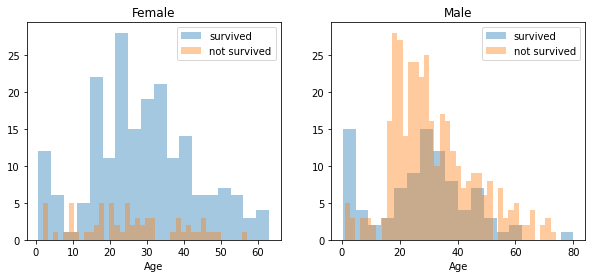

In [11]:
survived = 'survived'
not_survived = 'not survived'
fig,axes = plt.subplots(nrows=1,ncols=2,figsize =(10,4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax= sns.distplot(women[women['Survived']==1].Age.dropna(),bins = 18,label= survived,ax= axes[0],kde = False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(),bins = 40,label = not_survived,ax=axes[0],kde = False)
ax.legend()
ax.set_title('Female')
ax= sns.distplot(men[men['Survived']==1].Age.dropna(),bins =18,label= survived,ax= axes[1],kde = False)
ax= sns.distplot(men[men['Survived']==0].Age.dropna(),bins = 40,label= not_survived,ax= axes[1],kde = False)
ax.legend()
ax.set_title('Male')

# Embarked,Pclass and Sex

c:\users\munim\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\munim\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\munim\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


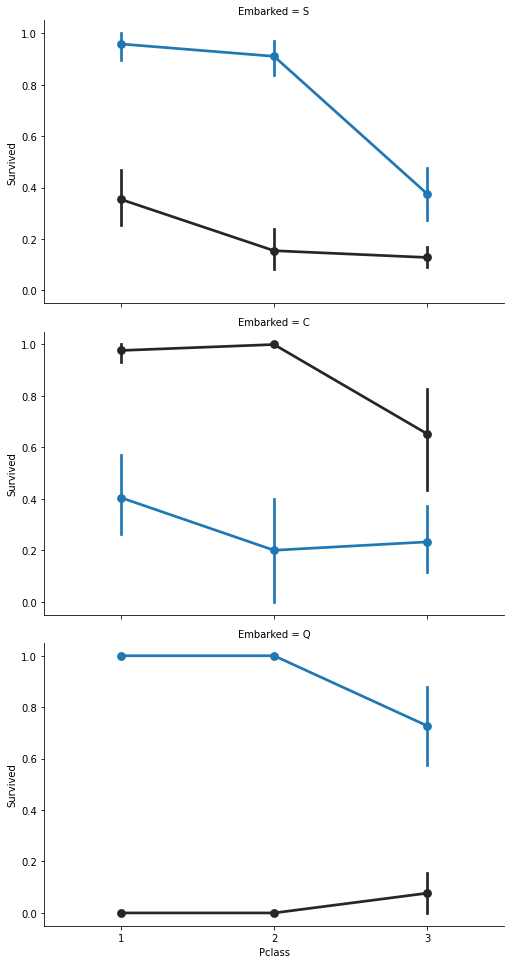

In [12]:
FacetGrid = sns.FacetGrid(train_df,row = 'Embarked', size = 4.5,aspect = 1.6)
FacetGrid.map(sns.pointplot,'Pclass','Survived','Sex')


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

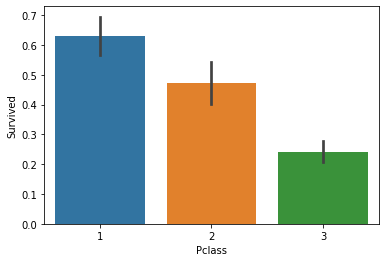

In [13]:
sns.barplot(x='Pclass',y='Survived',data=train_df)

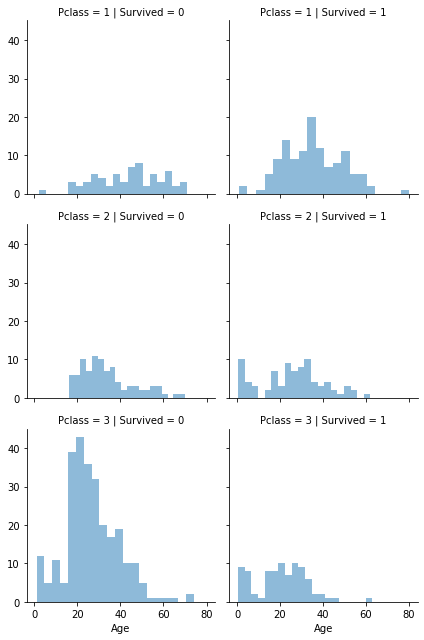

In [14]:
grid = sns.FacetGrid(train_df,col='Survived',row='Pclass')
grid.map(plt.hist,'Age',alpha=.5,bins=20)

In [15]:
data = [train_df,test_df]
for dataset in data:
    dataset['relatives']= dataset['SibSp']+dataset['Parch']
    dataset.loc[dataset['relatives']> 0,'not_alone']=0
    dataset.loc[dataset['relatives']==0,'not_alone']=1
    dataset['not_alone']=dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()    
    

1    537
0    354
Name: not_alone, dtype: int64

c:\users\munim\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\munim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


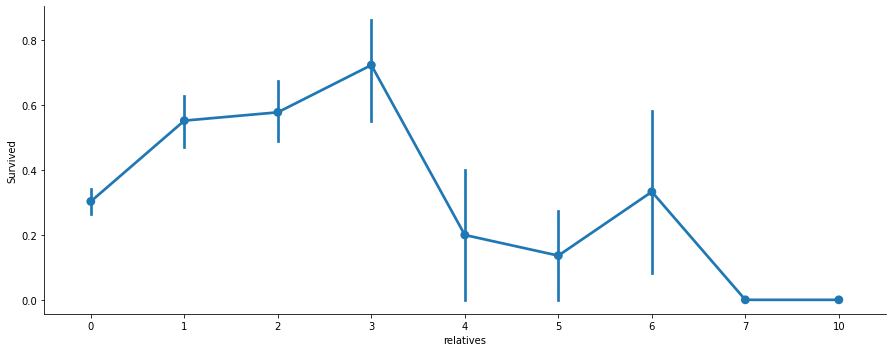

In [16]:
axes = sns.factorplot('relatives','Survived',data=train_df,aspect = 2.5,)

# Data Preprocessing

In [17]:
# train_df = train_df.drop(['PassengerId'],axis =1)

In [18]:
# import re

In [19]:
# deck = {"A": 1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"U":8}
# data = [train_df,test_df]
# for dataset in data: 
#     dataset['Cabin']= dataset['Cabin'].fillna("U0")
#     dataset['Deck']=dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
#     dataset['Deck']=dataset['Deck'].map(deck)
#     dataset['Deck'] = dataset['Deck'].fillna(0)
#     dataset['Deck'] = dataset['Deck'].astype(int)
    
    
#     train_df = train_df.drop(['Cabin'],axis = 1)
#     test_df = test_df.drop(['Cabin'],axis = 1)

In [20]:
train_df = train_df.drop(['Cabin'],axis = 1)
test_df = test_df.drop(['Cabin'],axis = 1)

In [21]:
data = [train_df,test_df]

for dataset in data:
    mean = train_df['Age'].mean()
    std = test_df['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    rand_age = np.random.randint(mean-std,mean+std, size= is_null)
    
    age_slice = dataset['Age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset['Age'] = age_slice
    dataset['Age'] = train_df['Age'].astype(int)
    
    train_df['Age'].isnull().sum()

In [22]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [23]:
common_value = 'S'
data = [train_df,test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
    

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  relatives    891 non-null    int64  
 12  not_alone    891 non-null    int32  
dtypes: float64(1), int32(2), int64(6), object(4)
memory usage: 83.7+ KB


# Fare

In [25]:
data = [train_df,test_df]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

# Sex

In [26]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data: 
    dataset['Sex'] = dataset['Sex'].map(genders)

# Ticket

In [27]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [28]:
train_df = train_df.drop(['Ticket'], axis  = 1)
test_df = test_df.drop(['Ticket'], axis = 1)

In [29]:
ports = {"S":0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data: 
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [30]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53,0,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,8,0,0,1


In [31]:
train_df = train_df.drop(["Name"],axis = 1)
test_df = test_df.drop(["Name"],axis = 1)

In [32]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,1,0,3,0,22,1,0,7,0,1,0
1,2,1,1,1,38,1,0,71,1,1,0
2,3,1,3,1,26,0,0,7,0,0,1
3,4,1,1,1,35,1,0,53,0,1,0
4,5,0,3,0,35,0,0,8,0,0,1


In [33]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,892,3,0,22,0,0,7,2,0,1
1,893,3,1,38,1,0,7,0,1,0
2,894,2,0,26,0,0,9,2,0,1
3,895,3,0,35,0,0,8,0,0,1
4,896,3,1,35,1,1,12,0,2,0


In [34]:
X_train = train_df.drop("Survived",axis = 1)
Y_train = train_df["Survived"]
X_test = test_df #.drop("PassengerId",axis = 1).copy()

In [35]:
#from sklearn import *

# Stochastic Gradient Descent(SGD)

In [36]:
sgd = linear_model.SGDClassifier(max_iter= 5, tol = None, random_state = 2)
sgd.fit(X_train,Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train)*100, 2)

In [37]:
#acc_sgd

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train,Y_train)
acc_random_forest = round(random_forest.score(X_train,Y_train)*100,2)

In [40]:
acc_random_forest

100.0

# Logistic Regression


In [41]:
logreg = LogisticRegression(max_iter=1000,random_state = 1)
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [42]:
acc_log

80.47

In [43]:
!pip install scikit-learn --upgrade

You should consider upgrading via the 'c:\users\munim\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


# K Nearest Neighbor

In [44]:

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train,Y_train)*100,2)

In [45]:
acc_knn

79.8

# Gaussian Naive Bayes

In [46]:
gaussian = GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train,Y_train)*100,2)

In [47]:
acc_gaussian

79.57

# Perceptron

In [49]:
perceptron = Perceptron(max_iter=20)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train,Y_train)*100,1)

In [50]:
acc_perceptron

38.0

# Linear Support Vector Machine

In [53]:
linear_svc = LinearSVC(max_iter = 1000)
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train,Y_train)*100,2)

c:\users\munim\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [58]:
results = pd.DataFrame({
    'Model' : ['Support vector','Perceptron','Naive Bayes','KNN','Logistic Regression','Random Forest','SGD'],
    'Score' : [acc_linear_svc,acc_perceptron,acc_gaussian,acc_knn,acc_log,acc_random_forest,acc_sgd]})
result_df = results.sort_values(by = 'Score', ascending = False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
80.47,Logistic Regression
79.80,KNN
79.57,Naive Bayes
73.51,Support vector
62.29,SGD
38.00,Perceptron


# K-Fold Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators = 100)
scores = cross_val_score(rf, X_train, Y_train, cv = 10, scoring = "accuracy")
print("Scores:",scores)
print("Mean:",scores.mean())
print("Standard Deviation:",scores.std())

Scores: [0.78888889 0.80898876 0.76404494 0.83146067 0.91011236 0.86516854
 0.80898876 0.79775281 0.86516854 0.80898876]
Mean: 0.8249563046192259
Standard Deviation: 0.04128423153832259
